# NEVH - Numerical Evolution from the Hamiltonian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#The following makes modules in src/ accessible from the (current) test/ dir
sys.path.append("../src")
import nevh

## Simple harmonic motion

In [2]:
def H(t,psi,k,m):
    x, p = psi
    return 0.5*k*x**2 + 0.5*p**2/m

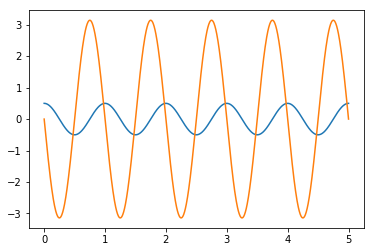

In [3]:
psi0 = np.array([0.5,0])
dpsi = np.ones(2)*0.05
# With k=4\pi^2, m=1, the period is 1
kc = 4 * np.pi**2
mc = 1
t, psi = nevh.trajectory(H, psi0, 0, 5, 1000, dpsi, k=kc, m=mc)
x, p = psi
plt.plot(t,x,t,p);

## Two equal coupled oscilators

Two equal masses are coupled to one another and to the walls of a box with equal springs.

In [4]:
def H2(t,s,k,m,L):
    x1, x2, p1, p2 = s
    U = 0.5 * k * ( (x1 + L/6)**2 + (x2-x1 - L/3)**2 + (x2 - L/6)**2)
    T = 0.5 * (p1**2 + p2**2) / m
    return T + U

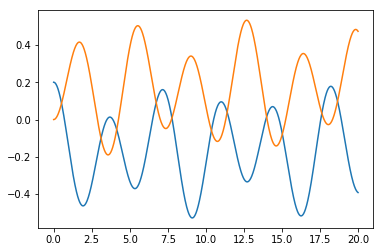

In [5]:
s0 = np.array([0.2, 0., 0., 0.])
ds = np.ones(4) * 0.02
t, s = nevh.trajectory(H2, s0, 0.0, 20.0, 1000, ds, k=1, m=1, L=1)
x1,x2,p1,p2 = s
plt.plot(t,x1,t,x2);

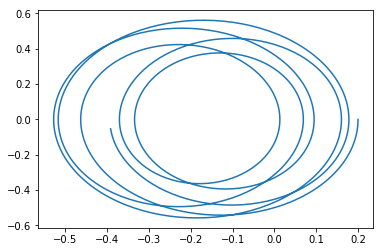

In [6]:
plt.plot(x1,p1); # Phase space trajectory for m1

## Elastic pendulum

In [7]:
from math import cos
def H3(t,s,m,g,l0,k):
    l, q, pl, pq = s
    T = (0.5 / m) * (pl**2 + (pq / l)**2)
    U = -m * g * l * cos(q) + 0.5 * k * (l - l0)**2
    return T + U

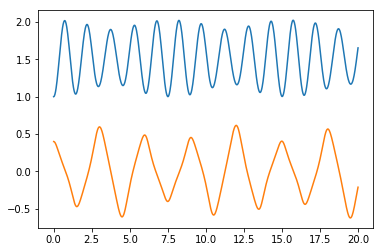

In [12]:
m = 1.0; g = 10.0; l0 = 1.0; k = 50.0
s0 = np.array([l0, 0.4, 0.0, 0.0])
ds = np.ones(4)*0.02
t, s = nevh.trajectory(H3, s0, 0.0, 20.0, 1000, ds, m=1.0, g=10.0, l0=1.0, k=20.0)
l, q, pl, pq = s
plt.plot(t,l, t,q);
